# PCA

In [ ]:
# imports and configs
import os
import pandas as pd
from sklearn.decomposition import PCA
import seaborn as sns


PROJECT_ROOT = f"{os.path.expanduser('~')}/project/AIAA5030_Data_Mining_Group13_Visualization"
DATA_ROOT = f"{PROJECT_ROOT}/data"
FIGURE_ROOT = f"{PROJECT_ROOT}/figure"


## Titanic Dataset
Visualize survived and survived passengers on a two-dimensional space

In [ ]:
# load dataset
Titanic_dataset = pd.read_csv(f'{DATA_ROOT}/Titanic-Dataset-Processed.csv')
Titanic_dataset

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,1.0,"Braund, Mr. Owen Harris",1,0.271174,0.125,0.000000,A/5 21171,0.014151,B96 B98,0.666667
1,2,1,0.0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,0.472229,0.125,0.000000,PC 17599,0.139136,C85,0.000000
2,3,1,1.0,"Heikkinen, Miss. Laina",0,0.321438,0.000,0.000000,STON/O2. 3101282,0.015469,B96 B98,0.666667
3,4,1,0.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,0.434531,0.125,0.000000,113803,0.103644,C123,0.666667
4,5,0,1.0,"Allen, Mr. William Henry",1,0.434531,0.000,0.000000,373450,0.015713,B96 B98,0.666667
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,0.5,"Montvila, Rev. Juozas",1,0.334004,0.000,0.000000,211536,0.025374,B96 B98,0.666667
887,888,1,0.0,"Graham, Miss. Margaret Edith",0,0.233476,0.000,0.000000,112053,0.058556,B42,0.666667
888,889,0,1.0,"Johnston, Miss. Catherine Helen ""Carrie""",0,0.367921,0.125,0.333333,W./C. 6607,0.045771,B96 B98,0.666667
889,890,1,0.0,"Behr, Mr. Karl Howell",1,0.321438,0.000,0.000000,111369,0.058556,C148,0.000000


<Axes: xlabel='Principal Component 1', ylabel='Principal Component 2'>

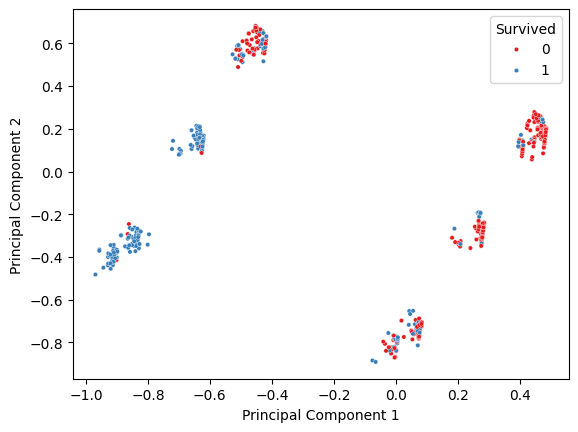

In [ ]:
pca = PCA(n_components=2)
# Pclass, Sex, Age, SibSp, Parch, Fare, and Embarked
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
Titanic_pca = pca.fit_transform(Titanic_dataset[features])
df = pd.DataFrame(data=Titanic_pca, columns=['Principal Component 1', 'Principal Component 2'])
df['Survived'] = Titanic_dataset['Survived']

pca_img = sns.scatterplot(data=df, x='Principal Component 1', y='Principal Component 2', hue='Survived', palette='Set1', s=10)
pca_img.figure.savefig(f'{FIGURE_ROOT}/PCA_Titanic_Dataset_Survived.png', dpi=600)
pca_img

In [7]:
# show the weight of each feature in each principal component
components = pd.DataFrame(data=pca.components_, columns=features, index=['Principal Component 1', 'Principal Component 2'])
components

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
Principal Component 1,0.399987,0.904265,-0.013632,-0.023201,-0.062174,-0.074412,0.110398
Principal Component 2,0.882224,-0.409112,-0.161400,0.056385,0.053905,-0.103289,0.107260


<Axes: xlabel='Principal Component 1', ylabel='Principal Component 2'>

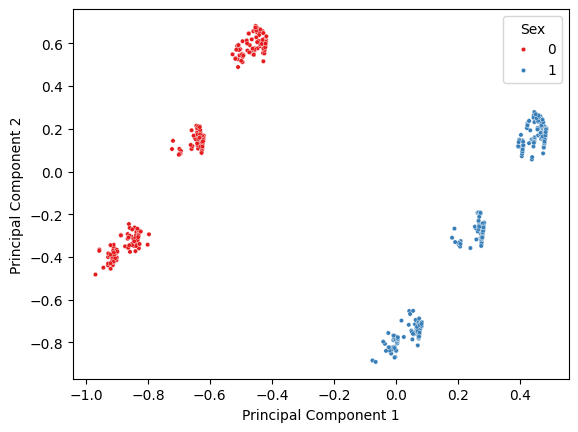

In [ ]:
df['Sex'] = Titanic_dataset['Sex']
sns.scatterplot(data=df, x='Principal Component 1', y='Principal Component 2', hue='Sex', palette='Set1', s=10)